# Proposal project 1: Housing Licensing and Registration in Montgomery County


​​Montgomery County Code Chapter 29 requires all residential and multifamily property owners obtain a rental housing license before their property may be rented or advertised for rent. Rental Housing Licenses are effective for one year from July 1st through June 30th.

All rental dwellings located in Montgomery County must be licensed by the Department of Housing and Community Affairs Licensing and Registration Unit. Property owners who fail to license a rental dwelling are subject to the issuance of a Class "A" Citation which carries a $500 fine.

**1. What is your issue of interest (provide sufficient background information)?**

I have a Master of science in civil engineering and I would like to become a data scientist in real estate industry. I am interested in every aspect of real estate.



**2. Why is this issue important to you and/or to others?**

As I am a french international student, I would need to learn the specificities of the real estate in the US. As I live in Rockville, it would be interesting for me to analyze dataset about Montgomery County. Also, this project will help me to identify the different "structure type" that may not exist in France.

**3. What questions do you have in mind and would like to answer?**

Here are the questions I have in mind I would like to answer:
  - What are the three cities in Montgomery County with with the greatest number of licenses? My hypothesis are Bethesda, Silver Spring and Rockville.
  - What is the Structure Type with the highest licenses?
  - What is the Ownership type with the highest licenses?


**4. Where do you get the data to help answer your questions?**

I found the data on the website "Data Montgomery". 

Here is the link (https://data.montgomerycountymd.gov/Consumer-Housing/Housing-Licensing-and-Registration/et5s-xste)

The dataset has 13 columns and 27.3K rows

**5. What will be your unit of analysis (for example, patient, organization, or country)? Roughly how many units (observations) do you expect to analyze? What variables/measures do you plan to use in your analysis?**

Given the questions I need to answer, my unit of analysis will be city, zip code, structure type, ownership type

**7. What kinds of techniques do you plan to use (for example, summary statistics, scatter plot, bar chart, chi-squared test)?**

I will use the summary statistics in my analysis (mean, the maximum,the minimum)

I will also use bar and pie charts

## Step 1- Set up environment

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

## Step 2 - Read Data

### 2.1 Read Data and select specific columns

In [4]:
# The dataset has 13 columns but I will use only 7 columns

df=pd.read_csv('Housing_Licensing_and_Registration.csv', usecols=["Ownership Type", "Property City", "Property Zip Code", "Structure Type", "Year Built", "License Type", "License Status"])
df.head()

,Ownership Type,Property City,Property Zip Code,Structure Type,Year Built,License Type,License Status
0,Corporation,BETHESDA,20816,Condominium in Highrise Building,1969.0,"Condominium(Garden, High Rise)/Co-op Apartments",Unlicensed
1,Sole ownership/Proprietor,GERMANTOWN,20874,Condominium in Garden Style Property,1992.0,"Condominium(Garden, High Rise)/Co-op Apartments",Licensed
2,Sole ownership/Proprietor,SILVER SPRING,20904,Condominium in Garden Style Property,1982.0,"Condominium(Garden, High Rise)/Co-op Apartments",Licensed
3,Trust,SILVER SPRING,209062090-,Single Family,1949.0,"Single Family, Townhouse, Back to Back, Duplex...",Licensed
4,Sole ownership/Proprietor,SILVER SPRING,20902,Garden Apartment - Multifamily with 1-4 stories,1974.0,"Condominium(Garden, High Rise)/Co-op Apartments",Withdrawn


### 2.2 Display Dataframe infos

In [5]:
df.dtypes

Ownership Type        object
Property City         object
Property Zip Code     object
Structure Type        object
Year Built           float64
License Type          object
License Status        object
dtype: object

The values in the "Year Built" column are float numbers. The others are object.

In [6]:
df.shape

(27274, 7)

There are 27274 rows and 7 columns.

## Step 3 - Data Cleaning

### 3.1 Change the column names

In [7]:
# We add an underscore to each space in the column titles so that I can manipulate them later

df.columns=["Ownership_Type", "Property_City", "Property_Zip_Code", "Structure_Type", "Year_Built", "License_Type", "License_Status"]
df

,Ownership_Type,Property_City,Property_Zip_Code,Structure_Type,Year_Built,License_Type,License_Status
0,Corporation,BETHESDA,20816,Condominium in Highrise Building,1969.0,"Condominium(Garden, High Rise)/Co-op Apartments",Unlicensed
1,Sole ownership/Proprietor,GERMANTOWN,20874,Condominium in Garden Style Property,1992.0,"Condominium(Garden, High Rise)/Co-op Apartments",Licensed
2,Sole ownership/Proprietor,SILVER SPRING,20904,Condominium in Garden Style Property,1982.0,"Condominium(Garden, High Rise)/Co-op Apartments",Licensed
3,Trust,SILVER SPRING,209062090-,Single Family,1949.0,"Single Family, Townhouse, Back to Back, Duplex...",Licensed
4,Sole ownership/Proprietor,SILVER SPRING,20902,Garden Apartment - Multifamily with 1-4 stories,1974.0,"Condominium(Garden, High Rise)/Co-op Apartments",Withdrawn
...,...,...,...,...,...,...,...
27269,Sole ownership/Proprietor,SILVER SPRING,20903,Single Family,1957.0,"Single Family, Townhouse, Back to Back, Duplex...",Unlicensed
27270,Sole ownership/Proprietor,MONTGOMERY VILLAGE,20886,Townhouse Single Family,1976.0,"Single Family, Townhouse, Back to Back, Duplex...",Unlicensed
27271,Sole ownership/Proprietor,SILVER SPRING,20904,Unknown,2007.0,"Single Family, Townhouse, Back to Back, Duplex...",Unlicensed
27272,Sole ownership/Proprietor,GERMANTOWN,20876,Condominium in Garden Style Property,1983.0,"Condominium(Garden, High Rise)/Co-op Apartments",Unlicensed


### 3.2 Clean the column "Property_City"

In [8]:
# Display all the value in the column "Property_City"

df.Property_City.unique()

array(['BETHESDA', 'GERMANTOWN', 'SILVER SPRING', 'ROCKVILLE',
       'MONTGOMERY VILLAGE', 'BURTONSVILLE', 'CHEVY CHASE', 'KENSINGTON',
       'Takoma Park', 'GAITHERSBURG', 'POOLESVILLE', 'BROOKEVILLE',
       'NORTH BETHESDA', 'POTOMAC', 'BELTSVILLE', 'TAKOMA PARK', 'OLNEY',
       'BOYDS', 'CLARKSBURG', 'CABIN JOHN', 'NORTH POTOMAC', 'DAMASCUS',
       'SANDY SPRING', 'DERWOOD', 'WHEATON', 'ASHTON', 'LAYTONSVILLE',
       'Bethesda', 'NO POTOMAC', 'COLESVILLE', 'DICKERSON', 'DARNESTOWN',
       'SPENCERVILLE', 'WASHINGTON GROVE', 'Chevy Chase', 'MT. AIRY',
       'GARRETT PARK', 'Silver Spring', 'Potomac', 'NORTH CHEVY CHASE',
       'HIGHLAND', 'MOUNT AIRY', 'BARNESVILLE', 'GLEN ECHO', 'SUMNER',
       'BEALLSVILLE', 'WEST BETHESDA', 'Rockville', 'BRINKLOW'],
      dtype=object)

In [9]:
# Replace the cities that have different names with a unique name


df['Property_City']=df['Property_City'].replace('NORTH BETHESDA', 'BETHESDA')
df['Property_City']=df['Property_City'].replace('WEST BETHESDA', 'BETHESDA')
df['Property_City']=df['Property_City'].replace('Bethesda', 'BETHESDA')
df['Property_City']=df['Property_City'].replace('Rockville', 'ROCKVILLE')
df['Property_City']=df['Property_City'].replace('NORTH POTOMAC', 'POTOMAC')
df['Property_City']=df['Property_City'].replace('Potomac', 'POTOMAC')
df['Property_City']=df['Property_City'].replace('NO POTOMAC', 'POTOMAC')
df['Property_City']=df['Property_City'].replace('Potomac', 'POTOMAC')
df['Property_City']=df['Property_City'].replace('NORTH CHEVY CHASE', 'CHEVY CHASE')
df['Property_City']=df['Property_City'].replace('Silver Spring', 'SILVER SPRING')
df['Property_City']=df['Property_City'].replace('Chevy Chase', 'CHEVY CHASE')
df.Property_City.unique()

array(['BETHESDA', 'GERMANTOWN', 'SILVER SPRING', 'ROCKVILLE',
       'MONTGOMERY VILLAGE', 'BURTONSVILLE', 'CHEVY CHASE', 'KENSINGTON',
       'Takoma Park', 'GAITHERSBURG', 'POOLESVILLE', 'BROOKEVILLE',
       'POTOMAC', 'BELTSVILLE', 'TAKOMA PARK', 'OLNEY', 'BOYDS',
       'CLARKSBURG', 'CABIN JOHN', 'DAMASCUS', 'SANDY SPRING', 'DERWOOD',
       'WHEATON', 'ASHTON', 'LAYTONSVILLE', 'COLESVILLE', 'DICKERSON',
       'DARNESTOWN', 'SPENCERVILLE', 'WASHINGTON GROVE', 'MT. AIRY',
       'GARRETT PARK', 'HIGHLAND', 'MOUNT AIRY', 'BARNESVILLE',
       'GLEN ECHO', 'SUMNER', 'BEALLSVILLE', 'BRINKLOW'], dtype=object)

### 3.3 Display the values of the "Ownership_Type" column

In [10]:
df.Ownership_Type.unique()

array(['Corporation', 'Sole ownership/Proprietor', 'Trust',
       'LLC - Limited Liability Company',
       'Housing Opportunities Community', 'Partnership',
       'Common Ownership Community', 'Non-Profit Organization'],
      dtype=object)

### 3.4 Display the values of the "Structure_Type" column

In [11]:
df.Structure_Type.unique()

array(['Condominium in Highrise Building',
       'Condominium in Garden Style Property', 'Single Family',
       'Garden Apartment - Multifamily with 1-4 stories',
       'Townhouse Single Family',
       'Midrise - Multifamily with 5-8 stories',
       'Back to Back - Single Family with Shared Back Wall',
       'Highrise - Multifamily with 9+ stories', 'Unknown',
       'Accessory Apartment / Dwelling Unit Class 3 - Existing Interior',
       'Condominium in Piggyback Townhouse',
       'Accessory Apartment / Dwelling Unit Class 1 - Existing Interior',
       'Quadraplex - Single Family with 4 floors or units',
       'Duplex - Single Family with 2 floors or units',
       'Mixed Structure Types',
       'Accessory Dwelling Unit Class 3 � New Attached',
       'Accessory Apartment / Dwelling Unit Class 3 - New Interior',
       'Accessory Dwelling Unit Class 3 � Existing Attached',
       'Accessory Dwelling Unit Class 3 � New Detached',
       'Accessory Dwelling Unit Class 3 � Exi

### 3.5 Display the values of the "License_Type" column

In [12]:
df.License_Type.unique()

array(['Condominium(Garden, High Rise)/Co-op Apartments',
       'Single Family, Townhouse, Back to Back, Duplex, Qu',
       'Multi-Family Survey - Out of Jurisdiction',
       'Multi-family/Apartment Complex', 'Accessory Apartment Class 1',
       'Accessory Dwelling Unit Class 3'], dtype=object)

### 3.6 Display the values of the "License_Status" column

In [13]:
df.License_Status.unique()

array(['Unlicensed', 'Licensed', 'Withdrawn', 'Survey Only', 'Pending',
       'Finding Conditional', 'Eliminated', 'Temporary License',
       'Condemned', 'Finding Denied', 'Denied', 'Finding Approved',
       'New Application', 'Revoked/Suspended', 'Pending Renewal',
       'Unregistered'], dtype=object)

## Step 4 - Aggregate Data

### 4.1 Aggregate licenses by Ownership type

In [14]:
df_ownership = df[["Ownership_Type","License_Status"]].groupby('Ownership_Type').agg(
    License_total=pd.NamedAgg("License_Status", "count")
)

df_ownership = df_ownership.reset_index()    #Reset index to create a months column
df_ownership

,Ownership_Type,License_total
0,Common Ownership Community,11
1,Corporation,564
2,Housing Opportunities Community,1620
3,LLC - Limited Liability Company,1162
4,Non-Profit Organization,2
5,Partnership,345
6,Sole ownership/Proprietor,22897
7,Trust,673


In [35]:
df_ownership=df_ownership.sort_values(by="License_total", ascending=False)

### 4.1 Aggregate licenses by Structure type

In [16]:
df_structure = df[["Structure_Type","License_Status"]].groupby('Structure_Type').agg(
    License_total=pd.NamedAgg("License_Status", "count")
)

df_structure = df_structure.reset_index()    #Reset index to create a months column
df_structure

,Structure_Type,License_total
0,Accessory Apartment / Dwelling Unit Class 1 - ...,11
1,Accessory Apartment / Dwelling Unit Class 3 - ...,3
2,Accessory Apartment / Dwelling Unit Class 3 - ...,172
3,Accessory Apartment / Dwelling Unit Class 3 - ...,49
4,Accessory Dwelling Unit Class 3 � Existing Att...,49
5,Accessory Dwelling Unit Class 3 � Existing Det...,13
6,Accessory Dwelling Unit Class 3 � New Attached,64
7,Accessory Dwelling Unit Class 3 � New Detached,9
8,Back to Back - Single Family with Shared Back ...,521
9,Condominium in Garden Style Property,809


In [17]:
df_structure=df_structure.sort_values(by="License_total", ascending=False)
df_top4=df_structure.head(4)
df_top4

,Structure_Type,License_total
19,Single Family,8054
20,Townhouse Single Family,7390
13,Garden Apartment - Multifamily with 1-4 stories,5045
14,Highrise - Multifamily with 9+ stories,2967


### 4.1 Aggregate licenses by city

In [18]:
df_city = df[["Property_City","License_Status"]].groupby('Property_City').agg(
    License_total=pd.NamedAgg("License_Status", "count")
)

df_city = df_city.reset_index()    #Reset index to create a months column
df_city.head()

,Property_City,License_total
0,ASHTON,29
1,BARNESVILLE,2
2,BEALLSVILLE,3
3,BELTSVILLE,31
4,BETHESDA,3931


In [30]:
df_city=df_city.sort_values(by="License_total", ascending=False)
df_top=df_city.head(3)
df_top

,Property_City,License_total
32,SILVER SPRING,7014
19,GERMANTOWN,3938
4,BETHESDA,3931


## Step 5 - Visualize Data

### 5.1 Bar plot: cities with the highest licenses 

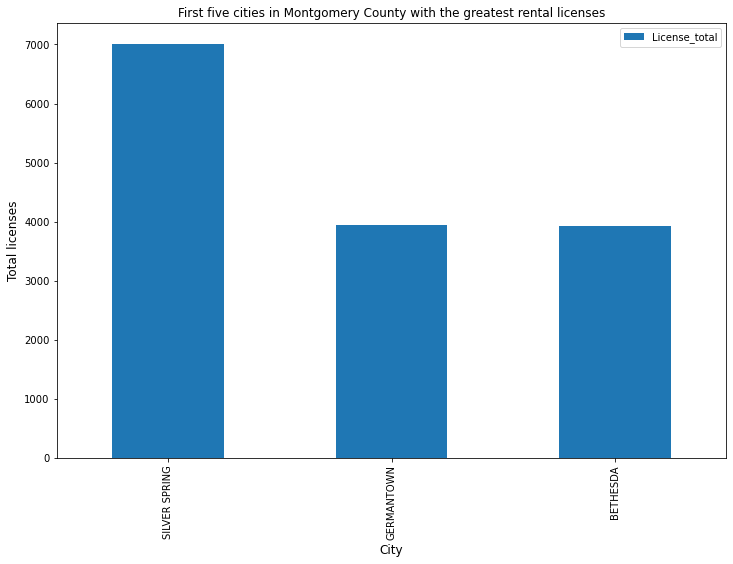

In [31]:
ax = df_top.plot.bar(
    x="Property_City", 
    y="License_total",
    title= "First five cities in Montgomery County with the greatest rental licenses",
    legend=True,
    figsize=(12,8)
)

ax.set_xlabel("City", fontsize=12)
ax.set_ylabel("Total licenses", fontsize=12)

plt.show()



The first five cities with the greatest rental licenses are : Silver Spring, Germantown and Bethesda.

### 5.2 Bar plot: Top 4 Structure type with the highest licenses

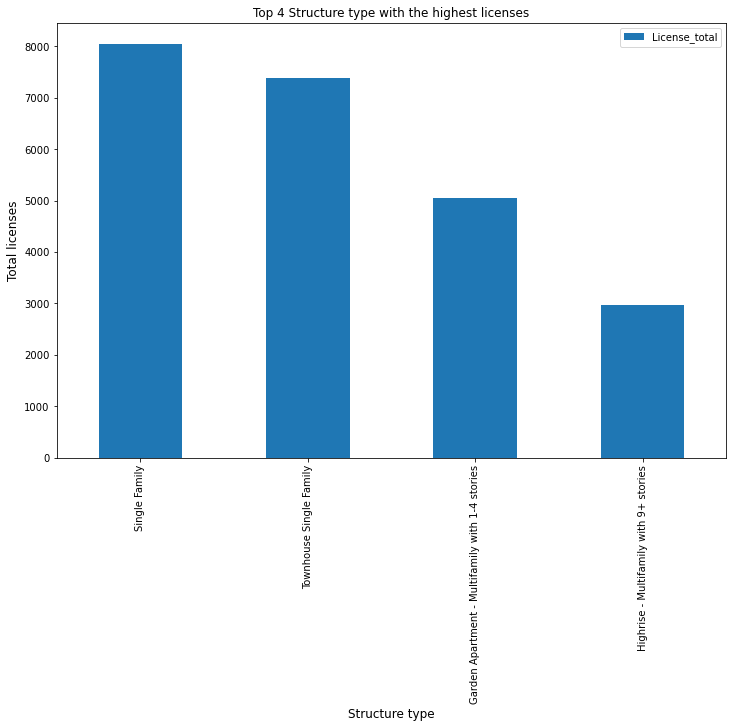

In [32]:
ax = df_top4.plot.bar(
    x="Structure_Type", 
    y="License_total",
    title= "Top 4 Structure type with the highest licenses",
    legend=True,
    figsize=(12,8)
)

ax.set_xlabel("Structure type", fontsize=12)
ax.set_ylabel("Total licenses", fontsize=12)

plt.show()

The structure type with the highest licenses is "Single Family" house.

### 5.3 Bar plot: Top 4 Ownership type with the highest licenses

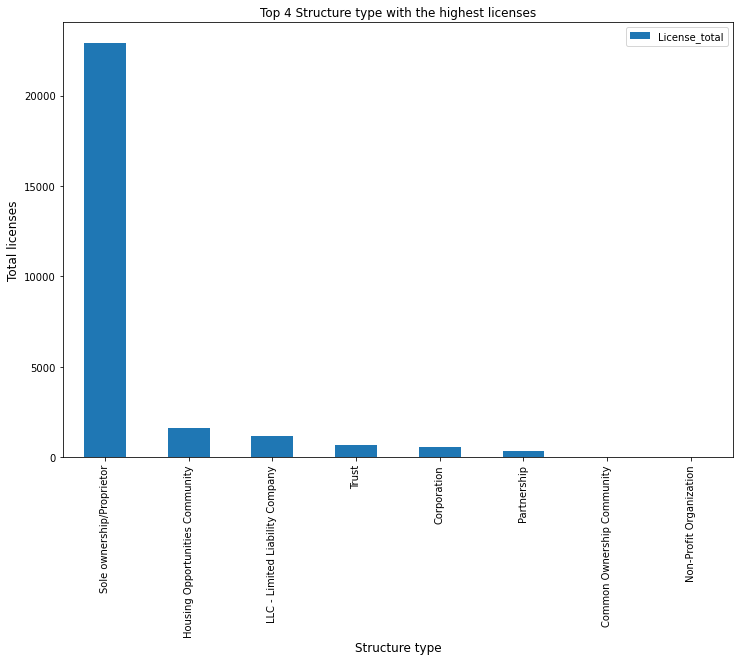

In [36]:
ax = df_ownership.plot.bar(
    x="Ownership_Type", 
    y="License_total",
    title= "Top 4 Structure type with the highest licenses",
    legend=True,
    figsize=(12,8)
)

ax.set_xlabel("Structure type", fontsize=12)
ax.set_ylabel("Total licenses", fontsize=12)

plt.show()

The ownership type with the highest licenses is "Sole ownership/Proprietor"